In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os
from   shapely.geometry import Point, Polygon, MultiPolygon, box
from   PIL import Image
import glob
import warnings; warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# original lake shapefile
hydrolakes = gpd.read_file('/Volumes/F:/hydrography/hydrolakes/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp')

# load the original and corrected shapefile for HDMA (pfaf 3 - North America)
riv1_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/HDMA/NorthAmerica_org/riv.gpkg')
cat1_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/HDMA/NorthAmerica_org/cat.gpkg')
lake1_org = hydrolakes
riv1 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/HDMA/NorthAmerica_corrected/riv.gpkg')
cat1 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/HDMA/NorthAmerica_corrected/cat.gpkg')
lake1 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/HDMA/NorthAmerica_corrected/lake.gpkg')

# load the original and corrected shapefile for MERIT-Basins (pfaf 71 - Nelson, Sask, pfaf 74 - Mississippi)
riv2_org_71 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf71_org/riv.gpkg')
cat2_org_71 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf71_org/cat.gpkg')
lake2_org = hydrolakes 
riv2_71 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf71_corrected/riv.gpkg')
cat2_71 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf71_corrected/cat.gpkg')
lake2_71 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf71_corrected/lake.gpkg')

riv2_org_74 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf74_org/riv.gpkg')
cat2_org_74 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf74_org/cat.gpkg')
lake2_org = hydrolakes 
riv2_74 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf74_corrected/riv.gpkg')
cat2_74 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf74_corrected/cat.gpkg')
lake2_74 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITBasins/pfaf74_corrected/lake.gpkg')

riv2_org = gpd.GeoDataFrame(
    pd.concat([riv2_org_71, riv2_org_74], ignore_index=True),
    crs=riv2_org_71.crs,)
cat2_org = gpd.GeoDataFrame(
    pd.concat([cat2_org_71, cat2_org_74], ignore_index=True),
    crs=cat2_org_71.crs,)
riv2 = gpd.GeoDataFrame(
    pd.concat([riv2_71, riv2_74], ignore_index=True),
    crs=riv2_71.crs,)
cat2 = gpd.GeoDataFrame(
    pd.concat([cat2_71, cat2_74], ignore_index=True),
    crs=cat2_71.crs,)
lake2 = gpd.GeoDataFrame(
    pd.concat([lake2_71, lake2_74], ignore_index=True),
    crs=lake2_71.crs,)

# load the original and corrected shapefile for the tailored river network
riv3_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITDerivedSK/org/riv.gpkg')
cat3_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITDerivedSK/org/cat.gpkg')
lake3_org = hydrolakes
riv3 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITDerivedSK/corrected/riv.gpkg')
cat3 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITDerivedSK/corrected/cat.gpkg')
lake3 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/MERITDerivedSK/corrected/lake.gpkg')

In [3]:
# -------------------------------------------------------
# ZOOM WINDOW + 2° MARGIN (same as before)
# -------------------------------------------------------
xmin, xmax = -108.60, -106.40
ymin, ymax = 50.45, 51.50

margin = 2.0

xmin2 = xmin - margin
xmax2 = xmax + margin
ymin2 = ymin - margin
ymax2 = ymax + margin

# Small buffer in degrees
buffer_size = 0.001

def clip_box(df):
    return df.cx[xmin2:xmax2, ymin2:ymax2]

# Current folder
folder_path = './'

# Remove all PNG files
#for file_path in glob.glob(os.path.join(folder_path, "*.png")):
#    os.remove(file_path)

# Remove all PDF files
#for file_path in glob.glob(os.path.join(folder_path, "*.pdf")):
#    os.remove(file_path)

#print("All PNG and PDF files have been removed from the current folder.")

Original river count: 34
Original cat count: 55
Original lake count: 109
Resolvable river count: 29
Resolvable cat count: 56
Resolvable lake count: 1


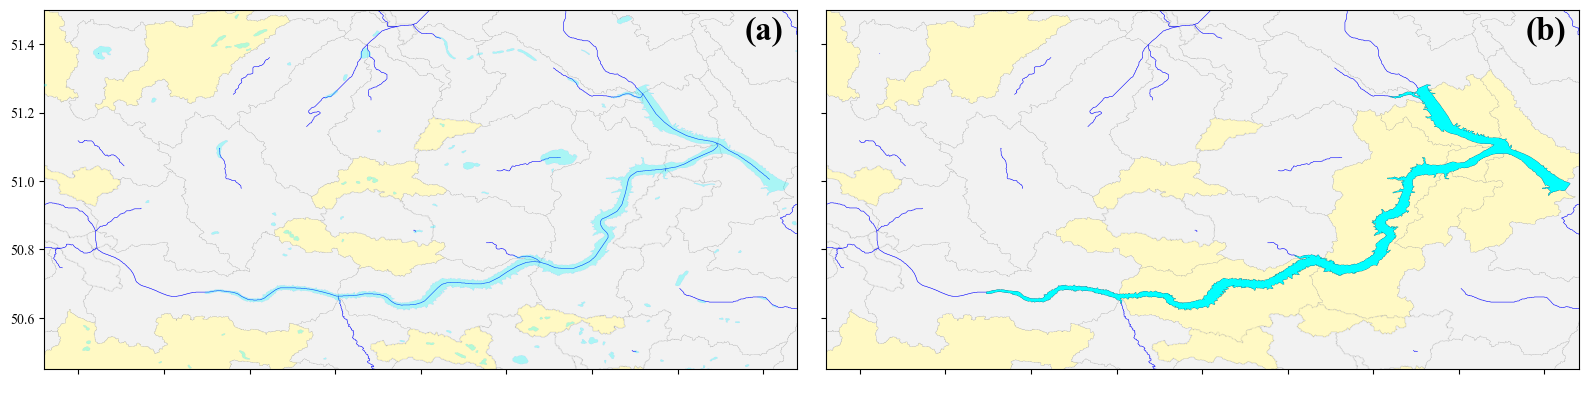

In [4]:
# -------------------------------------------------------
# CLIP ALL LAYERS TO REDUCED DOMAIN
# (for the second dataset: riv2, cat2, lake2)
# -------------------------------------------------------
riv1_org_clip  = clip_box(riv1_org)
cat1_org_clip  = clip_box(cat1_org)
lake1_org_clip = clip_box(lake1_org)
lake1_org_clip["geometry"] = lake1_org_clip.geometry.buffer(buffer_size)

riv1_clip  = clip_box(riv1)
cat1_clip  = clip_box(cat1)
lake1_clip = clip_box(lake1)
lake1_clip["geometry"] = lake1_clip.geometry.buffer(buffer_size)

bbox = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs=riv1_org_clip.crs)
riv1_org_count = gpd.sjoin(riv1_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original river count: {len(riv1_org_count)}")
cat1_org_count = gpd.sjoin(cat1_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original cat count: {len(cat1_org_count)}")
lake1_org_count = gpd.sjoin(lake1_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original lake count: {len(lake1_org_count)}")
riv1_count = gpd.sjoin(riv1_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable river count: {len(riv1_count)}")
cat1_count = gpd.sjoin(cat1_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable cat count: {len(cat1_count)}")
lake1_count = gpd.sjoin(lake1_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable lake count: {len(lake1_count)}")

# -------------------------------------------------------
# PLOTTING (side-by-side panels)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ========== LEFT: ORIGINAL ==========
ax = axes[0]
cat1_org_clip.plot(ax=ax, facecolor=cat1_org_clip['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
                   edgecolor="grey", linewidth=0.1, zorder=1)
riv1_org_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake1_org_clip.plot(ax=ax, facecolor="cyan", edgecolor="blue", linewidth=0.1, linestyle="--", alpha=0.3, zorder=3)

# ax.set_title("Original Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace y-ticks with empty space
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (a)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(a)", fontsize=24, fontweight='bold', color='black')

# ========== RIGHT: CORRECTED ==========
ax = axes[1]
cat1_clip.plot(ax=ax, facecolor=cat1_clip['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
               edgecolor="grey", linewidth=0.1, zorder=1)
riv1_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake1_clip.plot(ax=ax, facecolor=lake1_clip['endorheic'].map(lambda x: 'royalblue' if x==1 else 'cyan'), \
                edgecolor="black", linewidth=0.1, zorder=3) # or royalblue for endorheic

# ax.set_title("Corrected Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace x-ticks and y-ticks with empty space
ax.set_yticklabels([" "] * len(ax.get_yticks()))
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (b)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(b)", fontsize=24, fontweight='bold', color='black')

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure2_a_b.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)

Original river count: 415
Original cat count: 457
Original lake count: 109
Resolvable river count: 390
Resolvable cat count: 477
Resolvable lake count: 21


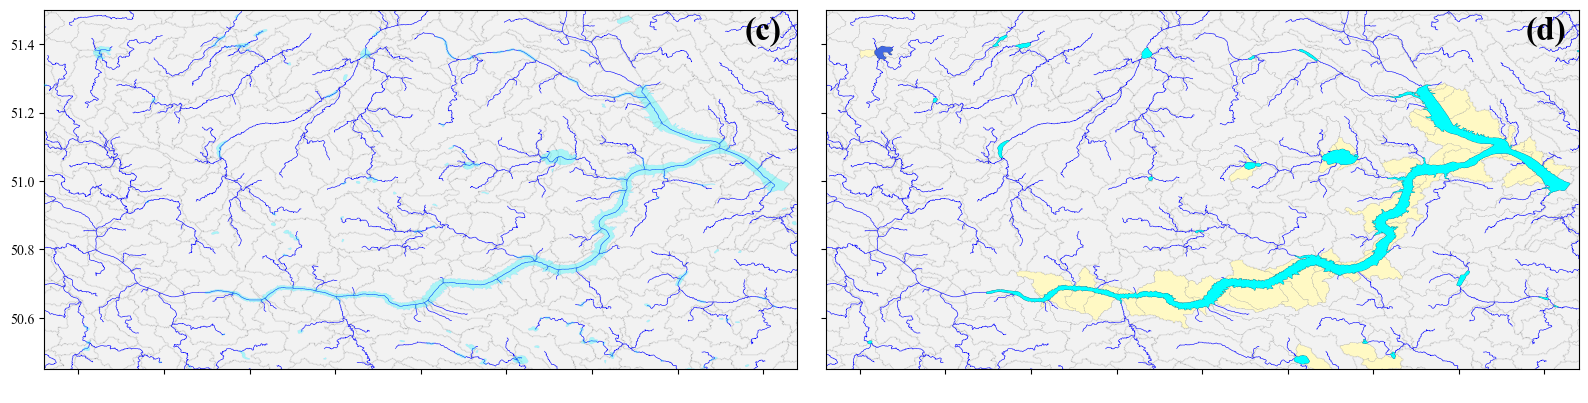

In [5]:
# -------------------------------------------------------
# CLIP ALL LAYERS TO REDUCED DOMAIN
# (for the second dataset: riv2, cat2, lake2)
# -------------------------------------------------------
riv2_org_clip  = clip_box(riv2_org)
cat2_org_clip  = clip_box(cat2_org)
lake2_org_clip = clip_box(lake2_org)
lake2_org_clip["geometry"] = lake2_org_clip.geometry.buffer(buffer_size)

riv2_clip  = clip_box(riv2)
cat2_clip  = clip_box(cat2)
lake2_clip = clip_box(lake2)
lake2_clip["geometry"] = lake2_clip.geometry.buffer(buffer_size)

bbox = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs=riv2_org_clip.crs)
riv2_org_count = gpd.sjoin(riv2_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original river count: {len(riv2_org_count)}")
cat2_org_count = gpd.sjoin(cat2_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original cat count: {len(cat2_org_count)}")
lake2_org_count = gpd.sjoin(lake2_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original lake count: {len(lake2_org_count)}")
riv2_count = gpd.sjoin(riv2_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable river count: {len(riv2_count)}")
cat2_count = gpd.sjoin(cat2_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable cat count: {len(cat2_count)}")
lake2_count = gpd.sjoin(lake2_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable lake count: {len(lake2_count)}")

# -------------------------------------------------------
# PLOTTING (side-by-side panels)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ========== LEFT: ORIGINAL ==========
ax = axes[0]
cat2_org_clip.plot(ax=ax, facecolor=cat2_org_clip['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
                   edgecolor="grey", linewidth=0.1, zorder=1)
riv2_org_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake2_org_clip.plot(ax=ax, facecolor="cyan", edgecolor="blue", linewidth=0.1, linestyle="--", alpha=0.3, zorder=3)

# ax.set_title("Original Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace y-ticks with empty space
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (c)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(c)", fontsize=24, fontweight='bold', color='black')

# ========== RIGHT: CORRECTED ==========
ax = axes[1]
cat2_clip.plot(ax=ax, facecolor=cat2_clip['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
               edgecolor="grey", linewidth=0.1, zorder=1)
riv2_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake2_clip.plot(ax=ax, facecolor=lake2_clip['endorheic'].map(lambda x: 'royalblue' if x==1 else 'cyan'), \
                edgecolor="black", linewidth=0.1, zorder=3) # or royalblue for endorheic

# ax.set_title("Corrected Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace x-ticks and y-ticks with empty space
ax.set_yticklabels([" "] * len(ax.get_yticks()))
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (d)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(d)", fontsize=24, fontweight='bold', color='black')

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure2_c_d.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)

Original river count: 1890
Original cat count: 1979
Original lake count: 109
Resolvable river count: 1800
Resolvable cat count: 2000
Resolvable lake count: 38


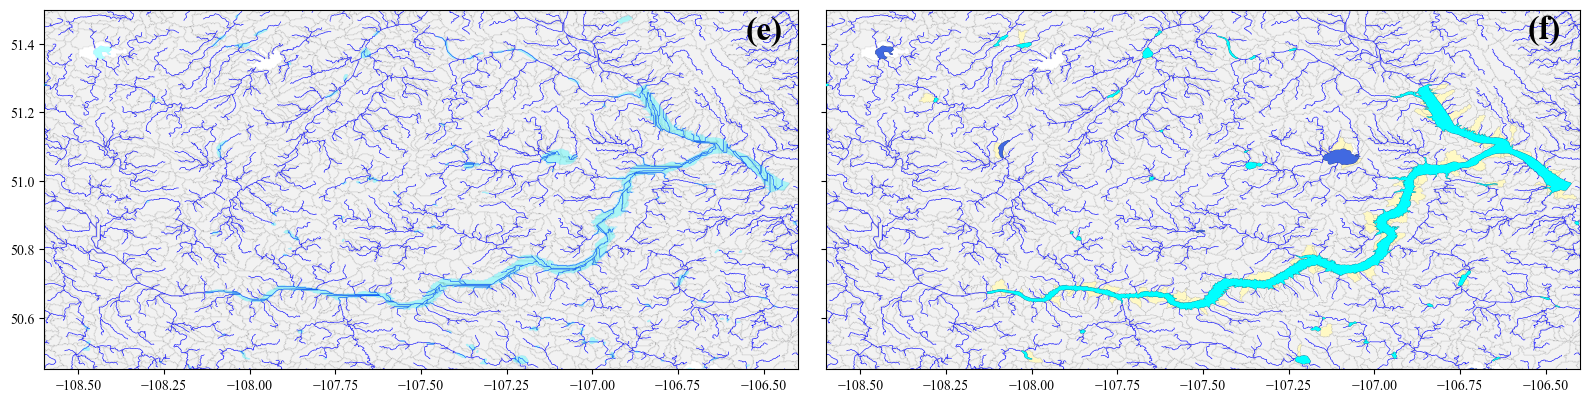

In [6]:
# -------------------------------------------------------
# CLIP ALL LAYERS TO REDUCED DOMAIN
# (for the second dataset: riv3, cat3, lake3)
# -------------------------------------------------------
riv3_org_clip  = clip_box(riv3_org)
cat3_org_clip  = clip_box(cat3_org)
lake3_org_clip = clip_box(lake3_org)
lake3_org_clip["geometry"] = lake3_org_clip.geometry.buffer(buffer_size)

riv3_clip  = clip_box(riv3)
cat3_clip  = clip_box(cat3)
lake3_clip = clip_box(lake3)
lake3_clip["geometry"] = lake3_clip.geometry.buffer(buffer_size)

bbox = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs=riv3_org_clip.crs)
riv3_org_count = gpd.sjoin(riv3_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original river count: {len(riv3_org_count)}")
cat3_org_count = gpd.sjoin(cat3_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original cat count: {len(cat3_org_count)}")
lake3_org_count = gpd.sjoin(lake3_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original lake count: {len(lake3_org_count)}")
riv3_count = gpd.sjoin(riv3_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable river count: {len(riv3_count)}")
cat3_count = gpd.sjoin(cat3_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable cat count: {len(cat3_count)}")
lake3_count = gpd.sjoin(lake3_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable lake count: {len(lake3_count)}")

# -------------------------------------------------------
# PLOTTING (side-by-side panels)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ========== LEFT: ORIGINAL ==========
ax = axes[0]
cat3_org_clip['non_channelized'] = 0
cat3_org_clip.plot(ax=ax, facecolor=cat3_org_clip['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
                   edgecolor="grey", linewidth=0.1, zorder=1)
riv3_org_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake3_org_clip.plot(ax=ax, facecolor="cyan", edgecolor="blue", linewidth=0.1, linestyle="--", alpha=0.3, zorder=3)

# ax.set_title("Original Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace y-ticks with empty space
#ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (e)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(e)", fontsize=24, fontweight='bold', color='black')

# ========== RIGHT: CORRECTED ==========
ax = axes[1]
#cat3_clip['non_channelized'] = 0
cat3_clip.plot(ax=ax, facecolor=cat3_clip['non_channelized'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
               edgecolor="grey", linewidth=0.1, zorder=1)
riv3_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake3_clip.plot(ax=ax, facecolor=lake3_clip['endorheic'].map(lambda x: 'royalblue' if x==1 else 'cyan'), \
                edgecolor="black", linewidth=0.1, zorder=3) # or royalblue for endorheic

# ax.set_title("Corrected Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace x-ticks and y-ticks with empty space
ax.set_yticklabels([" "] * len(ax.get_yticks()))
#ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (f)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(f)", fontsize=24, fontweight='bold', color='black')

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure2_e_f.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)

In [7]:
# ----------------------------
# Merge PNGs vertically
# ----------------------------
png_files = ["figure2_a_b.png", "figure2_c_d.png", "figure2_e_f.png"]
images = [Image.open(png) for png in png_files]

# Calculate total width and height
total_width = max(img.width for img in images)
total_height = sum(img.height for img in images)

# Create a new blank image
merged_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))

# Paste images one below the other
y_offset = 0
for img in images:
    merged_image.paste(img, (0, y_offset))
    y_offset += img.height

# Save the final merged image
merged_image.save("Figure_2.png", dpi=(1200, 1200))

# Remove the png files
for file in png_files:
    if os.path.exists(file):
        os.remove(file)
        print(f"Removed {file}")
    else:
        print(f"{file} does not exist")

Removed figure2_a_b.png
Removed figure2_c_d.png
Removed figure2_e_f.png
